In [15]:
import sys
sys.path.append('..')

# Open Data Comes In All Forms

Here we will outline some of the common formats seen and 

## PDF

Monthly reports of 311 service requests

![pdf](https://github.com/knoxdata/knoxville-opendata-notebooks/raw/master/images/311-pdf-snippet.png)

In [16]:
# PDF files are extremely hard to parse especially as text
from PyPDF2 import PdfFileReader

pdf = PdfFileReader('../data/codestock/311_2019_01.pdf')
full_text = ""
for i in range(pdf.getNumPages()):
    full_text += pdf.getPage(i).extractText()
full_text[198:300]

'\nTop 5 Service Requests Received\n \nService Request \nCategory\n \nTotal Number \n \nAverage Days Open\n \nCod'

In [17]:
# camelot uses 
import camelot

tables = camelot.read_pdf('../data/codestock/311_2019_01.pdf')
tables[0].df[18:24]

,0,1,2,3,4,5,6,7,8
18,,,Top 5 Service Requests Received,,,,,,
19,,,Service Request Category,Total Number,,Average Days Open,,,
20,,,Codes Enforcement: Lot Complaint,928,,16.0,,,
21,,,Street Light Repair/Replace,566,,9.6,,,
22,,,Trash Pickup Missed,258,,2.3,,,
23,,,Trash/Recycling Cart Issue,197,,2.0,,,


## (Undocumented) Rest APIs

![tree data](../images/tree-conference-center.jpg)

In [31]:
import requests
from knoxdata.source.trees import query_tree_inventory

session = requests.session()
session.headers.update({
    'Host': 'www.kgis.org',
    'Referer': 'https://www.kgis.org/maps/treeinventory.html',
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'
})
resp = session.get('http://www.kgis.org/maps/treeinventory.html') # get cookies
# lattitude, longitude, area, session
trees = query_tree_inventory(2583261.941640865, 600217.0654281484, 5000.0, session)['trees']
trees.head(5)

,ADDRESS,AREA2,COMMONNAME,CULTIVAR,DBH,FROMSTR,ID,ONSTR,SIDE,SITE,SPP,STEMS,STREET,SUFFIX,TOSTR,X,Y,YRPLNT
OBJECTID,,,,,,,,,,,,,,,,,,
7884,502,CBID,Golden Raintree,None,20,LOCUST ST,727,SUMMIT HILL DR W,Median,1,Koelreuteria paniculata,1,SUMMIT HILL DR W,X,WALNUT ST,2583344.880,600648.1800,0
12462,501,CBID,Water Oak,None,15,WALNUT ST,723,SUMMIT HILL DR W,Front,6,Quercus nigra,1,SUMMIT HILL DR W,X,LOCUST ST,2583338.360,600790.4100,0
8487,600,Knoxville Fire Department # 1,Crapemyrtle,None,5,KNOXVILLE FIRE DEPARTMENT # 1,9638,KNOXVILLE FIRE DEPARTMENT # 1,Open,43,Lagerstroemia indica,2,SUMMIT HILL DR W,X,KNOXVILLE FIRE DEPARTMENT # 1,2583465.641,600229.1180,0
6836,600,Knoxville Fire Department # 1,Honeylocust,None,17,KNOXVILLE FIRE DEPARTMENT # 1,9684,KNOXVILLE FIRE DEPARTMENT # 1,Open,5,Gleditsia triacanthos,1,SUMMIT HILL DR W,X,KNOXVILLE FIRE DEPARTMENT # 1,2583404.691,600311.5666,0
6834,600,Knoxville Fire Department # 1,Honeylocust,None,18,KNOXVILLE FIRE DEPARTMENT # 1,9632,KNOXVILLE FIRE DEPARTMENT # 1,Open,38,Gleditsia triacanthos,1,SUMMIT HILL DR W,X,KNOXVILLE FIRE DEPARTMENT # 1,2583497.491,600262.5635,0


In [42]:
trees.COMMONNAME.value_counts()[:10]

Willow Oak           139
Japanese Zelkova      64
Golden Raintree       63
Sugar Maple           54
American Holly        51
Eastern Redbud        44
Crapemyrtle           44
Flowering Dogwood     39
Red Maple             33
Pin Oak               30
Name: COMMONNAME, dtype: int64

## Excel 

City completed potholes in 2018

![potholes](../images/current-potholes.png)

In [103]:
import pandas

potholes = pandas.read_excel(
    '../data/codestock/completed_potholes_2018.xls', 
    names=['wo-number', 'created', 'completed', 'organ', 'ctr', 'wo units', 'weight'],
    parse_dates=['created', 'completed'],
    skiprows=12, 
    nrows=500,
    usecols=[1, 6, 9, 14, 15, 16, 19])

potholes.head(5)

,wo-number,created,completed,organ,ctr,wo units,weight
0,WO-PS-17-021073,2017-09-20 12:33:24,2018-04-19,43124,209.0,0.00,0.0
1,WO-PS-17-026880,2017-12-27 13:54:32,2018-01-09,43124,502.0,1.00,2000.0
2,WO-PS-17-026991,2017-12-29 12:57:59,2018-01-09,43124,610.0,0.25,500.0
3,WO-PS-17-026999,2017-12-29 16:01:00,2018-01-09,43124,604.0,0.50,1000.0
4,WO-PS-18-000196,2018-01-04 13:29:30,2018-01-09,43124,604.0,0.25,500.0


In [97]:
print('Average pothole takes: %s days to fill' % (potholes.completed - potholes.created).dt.days.mean())

Average pothole takes: 1.154 days to fill


# csv

Knoxville parking data for parking garages downtown

In [107]:
parking = pandas.read_csv('../data/codestock/parking_data.csv', parse_dates=['datetime'])

In [102]:
parking.head(5)

,cars,type,garage,datetime
0,0,occupancy,Locust Street Garage,2018-08-06 00:00:00
1,0,occupancy,Locust Street Garage,2018-08-06 01:00:00
2,0,occupancy,Locust Street Garage,2018-08-06 02:00:00
3,0,occupancy,Locust Street Garage,2018-08-06 03:00:00
4,0,occupancy,Locust Street Garage,2018-08-06 04:00:00


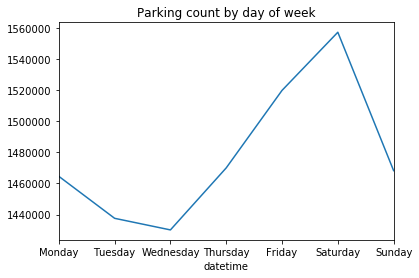

In [114]:
ax = parking.groupby(parking.datetime.dt.dayofweek).cars.sum().plot()
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = ax.set_title('Parking count by day of week')